In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [41]:
from fastai.conv_learner import *
import json
from matplotlib import patches, patheffects

In [3]:
PATH = Path('data/pascal')
# list(PATH.iterdir())
!ls {PATH}

PASCAL_VOC.zip              pascal_train2007.json
VOCdevkit                   pascal_train2012.json
VOCtrainval_06-Nov-2007.tar pascal_val2007.json
models                      pascal_val2012.json
pascal_test2007.json        tmp


In [27]:
IM_PATH = PATH/'VOCdevkit/VOC2007/JPEGImages'

In [5]:
!ls {PATH/'VOCdevkit/VOC2007/'}

Annotations        JPEGImages         SegmentationObject
ImageSets          SegmentationClass


In [6]:
trn_json = json.load( (PATH/'pascal_train2007.json').open() )  # call open on the PosixPath object
trn_json.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [12]:
cats = {row['id']: row['name'] for row in trn_json['categories']}
trn_imgs = {row['id']: row['file_name'] for row in trn_json['images']}
trn_ids = list(trn_imgs.keys())

In [14]:
trn_json['annotations'][:2]
# bbox: top left (cols, rows), height, width

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

## dictionary => key: image_id, value: ([annotations],category_id)

In [23]:
trn = collections.defaultdict(lambda: [])
for row in trn_json['annotations']:
    if not row['ignore']: 
        bb = row['bbox']
        bb = np.array([bb[1], bb[0], bb[3]+bb[1], bb[2]+bb[0]])
        # PASCALVOC defaults to (col,row) of top left, height, width
        # we use (row,col) of top left, row,col of bottom right
        trn[row['image_id']].append((bb,row['category_id']))
        # appending because we're using [] as our default dict -> allows us to add multiple bboxes per image

In [24]:
trn[17]

[(array([ 61, 184, 199, 279]), 15), (array([ 77,  89, 336, 403]), 13)]

In [25]:
def bb_hw(a): return np.array([a[1], a[0], a[3]-a[1], a[2]-a[0]])

In [26]:
bb_hw(trn[17][0][0])

array([184,  61,  95, 138])

## plotting functions

In [28]:
im = open_image(IM_PATH/trn_imgs[17])

In [33]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.axis('off')
    return ax

In [80]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(linewidth=lw, foreground='black'), patheffects.Normal()])
    # draws the path twice, once w/ thick black line, again with color below

In [81]:
def draw_rectangle(ax, b):
    o = ax.add_patch(patches.Rectangle(b[:2], *b[2:], fill=False, edgecolor='white', lw=2))
    draw_outline(o, 4)

In [82]:
def draw_text(ax, xy, txt, sz=14):
    o = ax.text(*xy, txt, verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(o, 2)

In [83]:
def draw_img(im, anno):
    ax = show_img(im, figsize=(10,6))
    for b,c in anno:
        b = bb_hw(b)
        draw_rectangle(ax, b)
        draw_text(ax, b[:2], cats[c])

In [84]:
def draw_idx(idx):
    im = open_image(IM_PATH/trn_imgs[idx])
    draw_img(im, trn[idx])
    print(im.shape)

(364, 480, 3)


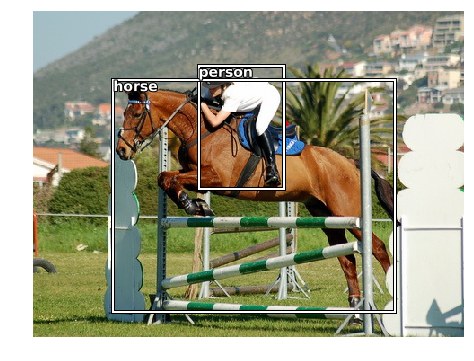

In [85]:
draw_idx(17)